# Refrences
## Derive back propagation by hand
- https://www.youtube.com/watch?v=1GnfvhBUs_E
- https://www.youtube.com/watch?v=Ad_lvb8CzEk
- https://www.youtube.com/watch?v=dB-u77Y5a6A

## Autograd code
- https://www.youtube.com/watch?v=VMj-3S1tku0

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from comp_graph import draw_dot
from engine import Value

%matplotlib inline


# Gradients in Computational Graph

## Local Gradient
This is the derivative of a node with respect to its immediate inputs. <br>
Example: For the first multiplication node (see below), the local gradients are:
$$
\frac{∂a}{∂x} = y = 3 \\
\frac{∂a}{∂y} = x = 2
$$

## Downstream Gradient
This is the gradient flowing backward from later nodes. It represents how the final output changes with respect to the node's output. <br>
Example: The downstream gradient reaching the addition node is 2 $(\frac{dL}{db} = 2)$ <br>

Note that the downstream gradient is actually the delta, when deriving the back porpagation by hand.

## Upstream Gradient
This is the gradient we pass to earlier nodes. It's computed by multiplying the local gradient with the downstream gradient. <br>
For example, for variable `x`:
- Downstream gradient $(\frac{dL}{da})$ = 2
- Local gradient $(\frac{∂a}{∂x})$ = 3
- Upstream gradient $(\frac{dL}{dx}) = 2 \times 3 = 6$
<br>

So each `dL/d(some_variable)` is actually an upstream gradient. <br><br>
**The chain rule ties these together:** <br><br>
`Upstream gradient = Local gradient × Downstream gradient`
 <br> <br>

[![](https://mermaid.ink/img/pako:eNqNVe1umzAUfRXL-5NKWQYmISkb_VFV3Z-kqrROmlqqyWCHoAKO-BiBtk-wV9o77RV2zUcxbZrMv4Lvucfn3nscP2JPMI4tvA5F4W1okqHzGydGsNLc9RO63SAHf00oC3icpQ5uYnKxIOFeFogY3Zz3u7HI-MjB37dplnAaIaBgFvriJmeILT-xEY3LEwef9AnVCOCTyQQ2TyzLCuJfQRq4IUcfP56hyleAvkTeSlwde3IwE0XcniPJIfaEojz07xz8w8H3TqzoqrOvGiX5Vsm6OsB4JRkpY_4dKLxX5fXMUc282sO8OsC86ph7IoUSaujyQuHRELHbRkzsH0NJ4shXS0deSNP0gq9R39x1EIbWh8t6adoYgTLxwPudz006j9kbM5xT7wFdJ2JLfSrHf9wTSyI7tLSJ1hthaesHurNsJ0l-kj2zdCWda-sKnWuT3SFCt223XhP-_fO7puwIi1pgYZOesAD6hvGdAYG0V81vj3GPwwqAFUQtiUoB1DZ7AdQmw9OrWmRlT3tM9RrTVDg8cMRcYINL90T_A1hJYDXU9k5PaTskXRlSl7Orxe7UjsLHzhjKLWtUaRs9qgRUW9Sgj2_UMgqUoADQR3El4EqiWPqNqS9FUtCEoWu4KfsN3f0t1tXpoxGU07pNnqrUBDGoaBAbKmybBXEAUH2fvyiQgBtaEjksxQcQAxcMYsPBvji8OcIdAFxIl3enF6g0sIBgoRZG3nP_oIglpMnr3c227jEe44gnEQ0YPC-PMuDgbMMj7mALfjKaPMhOPwOO5pn4VsYetrIk52OciNzfYGtNwxS-8i2jGb8IKAwr6iCcBZlIVs3jVb9hY7yl8a0QLxD4xNYj3mFrZkyIbs6nC2M-00xizsa4xJZJJgvTWJxOp6fz07mhkecxrup8bTKfLUxzOjdliqlrxvM_-_L8ng?type=png)](https://mermaid.live/edit#pako:eNqNVe1umzAUfRXL-5NKWQYmISkb_VFV3Z-kqrROmlqqyWCHoAKO-BiBtk-wV9o77RV2zUcxbZrMv4Lvucfn3nscP2JPMI4tvA5F4W1okqHzGydGsNLc9RO63SAHf00oC3icpQ5uYnKxIOFeFogY3Zz3u7HI-MjB37dplnAaIaBgFvriJmeILT-xEY3LEwef9AnVCOCTyQQ2TyzLCuJfQRq4IUcfP56hyleAvkTeSlwde3IwE0XcniPJIfaEojz07xz8w8H3TqzoqrOvGiX5Vsm6OsB4JRkpY_4dKLxX5fXMUc282sO8OsC86ph7IoUSaujyQuHRELHbRkzsH0NJ4shXS0deSNP0gq9R39x1EIbWh8t6adoYgTLxwPudz006j9kbM5xT7wFdJ2JLfSrHf9wTSyI7tLSJ1hthaesHurNsJ0l-kj2zdCWda-sKnWuT3SFCt223XhP-_fO7puwIi1pgYZOesAD6hvGdAYG0V81vj3GPwwqAFUQtiUoB1DZ7AdQmw9OrWmRlT3tM9RrTVDg8cMRcYINL90T_A1hJYDXU9k5PaTskXRlSl7Orxe7UjsLHzhjKLWtUaRs9qgRUW9Sgj2_UMgqUoADQR3El4EqiWPqNqS9FUtCEoWu4KfsN3f0t1tXpoxGU07pNnqrUBDGoaBAbKmybBXEAUH2fvyiQgBtaEjksxQcQAxcMYsPBvji8OcIdAFxIl3enF6g0sIBgoRZG3nP_oIglpMnr3c227jEe44gnEQ0YPC-PMuDgbMMj7mALfjKaPMhOPwOO5pn4VsYetrIk52OciNzfYGtNwxS-8i2jGb8IKAwr6iCcBZlIVs3jVb9hY7yl8a0QLxD4xNYj3mFrZkyIbs6nC2M-00xizsa4xJZJJgvTWJxOp6fz07mhkecxrup8bTKfLUxzOjdliqlrxvM_-_L8ng)

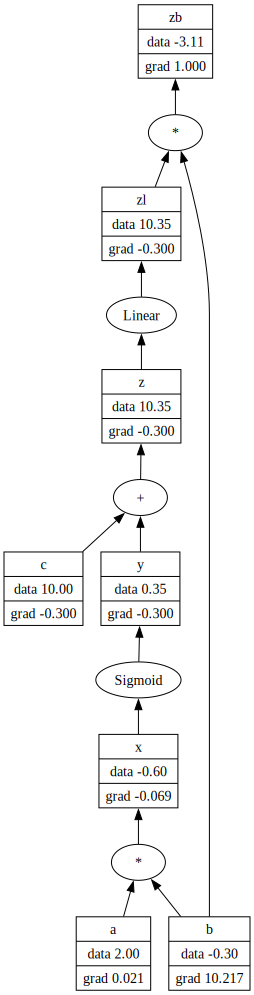

In [6]:
a = Value(2.0, label='a')
b = Value(-0.3, label='b')
c = Value(10.0, label='c')

x = a * b
y = x.sigmoid()
z = y + c
zl = z.linear()
zb = zl * b

x.label = 'x'
y.label = 'y'
z.label = 'z'
zl.label = 'zl'
zb.label = 'zb'

# print(list(reversed(z._topo_sort())))
zb.backward()
draw_dot(zb)


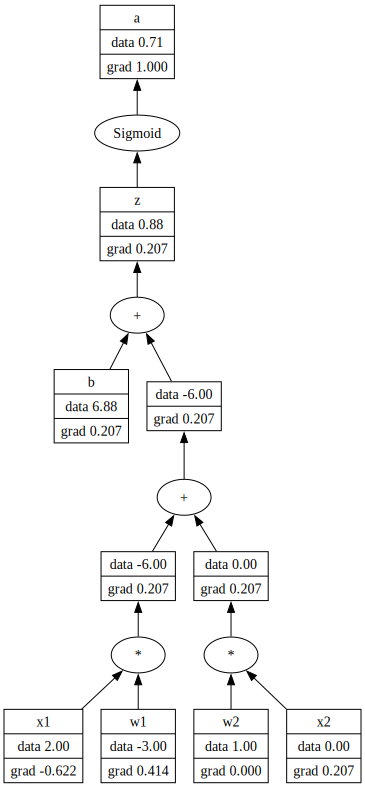

In [3]:
# Simple Neuron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.88, label='b')

# Forward pass
# x1w1 = x1 * w1; x1w1.label = 'x1w1'
# x2w2 = x2 * w2; x2w2.label = 'x2w2'
# n = x1w1 + x2w2 + b; n.label = 'n'
z = (x1*w1) + (x2*w2) + b; z.label = 'z'

# Activation function
a = z.sigmoid(); a.label = 'a'

# Backward pass
a.backward()

draw_dot(a)

After we calculated the gradients, if we want `z` to go up, we move in the direction of the grad (add if it's positive and subtract if the grad was negative).